In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("data_for_lr.csv")

In [3]:
data.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [4]:
data.isnull().sum()

x    0
y    1
dtype: int64

In [5]:
data = data.dropna()
data.shape

(699, 2)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 699 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       699 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 16.4 KB


In [7]:
# training dataset and labels
train_input = np.array(data.x[0:500]).reshape(500,1)
train_output  = np.array(data.y[0:500]).reshape(500,1)

# valid dataset and labels
test_input = np.array(data.x[500:700]).reshape(199,1)
test_output  = np.array(data.y[500:700]).reshape(199,1)

# print the shapes
print("Train Input Shape = {}".format(train_output.shape))
print("Train Output  Shape = {}".format(train_output.shape))
print("Test Input Shape = {}".format(test_input.shape))
print("Test Output  Shape = {}".format(test_output.shape))

Train Input Shape = (500, 1)
Train Output  Shape = (500, 1)
Test Input Shape = (199, 1)
Test Output  Shape = (199, 1)


# Linear Regession 

### Forward propogation
#### f(x) = m*x + c

In [8]:
def forward_propagation(train_input, parameters):
    m = parameters['m']
    c = parameters['c']
    predictions = np.multiply(m, train_input) + c
    return predictions  

### Cost Function
#### Summation(1/2n * (y - f(x)^2))

In [9]:
def cost_function(predictions, train_output):
    cost = np.mean((train_output - predictions) ** 2) * 0.5
    return cost

### Gradient Descent for Backpropogation
#### df = f(x) - y
#### dm = df * x
#### dc = df * 1

In [10]:
def backward_propagation(train_input, train_output, predictions):
    derivatives = dict()
    df = (train_output - predictions) * -1
    dm = np.mean(np.multiply(train_input, df))
    dc = np.mean(df)
    derivatives['dm'] = dm
    derivatives['dc'] = dc
    return derivatives

### Update Parameter 
#### m = m - (learning_rate * dm)
#### c = c - (learning_rate * dc)

In [11]:
def update_parameters(parameters, derivatives, learning_rate):
    parameters['m'] = parameters['m'] - learning_rate * derivatives['dm']
    parameters['c'] = parameters['c'] - learning_rate * derivatives['dc']
    return parameters

### Train the data

In [12]:
def train(train_input, train_output, learning_rate, iters):
    
    #random parameters
    parameters = dict()
    parameters["m"] = np.random.uniform(0,1) * -1
    parameters["c"] = np.random.uniform(0,1) * -1
    
    plt.figure()
        
    #loss
    loss = list()
    
    #iterate
    for i in range(iters):
        
        #forward propagation
        predictions = forward_propagation(train_input, parameters)
        
        #cost function
        cost = cost_function(predictions, train_output)
        
        #append loss and print
        loss.append(cost)
        print("Iteration = {}, Loss = {}".format(i+1, cost))
        
        #plot function
        fig, ax = plt.subplots()
        
        ax.plot(train_input, train_output, '+', label='Original')
        ax.plot(train_input, predictions, '*', label='Training')

        legend = ax.legend()
        
        plt.plot(train_input, train_output, '+')
        plt.plot(train_input, predictions, '*')        
        
        plt.show()
        
        #back propagation
        derivatives = backward_propagation(train_input, train_output, predictions)
        
        #update parameters
        parameters = update_parameters(parameters, derivatives, learning_rate)
        
    return parameters, loss

### Training

Iteration = 1, Loss = 3178.8401491373506


<Figure size 640x480 with 0 Axes>

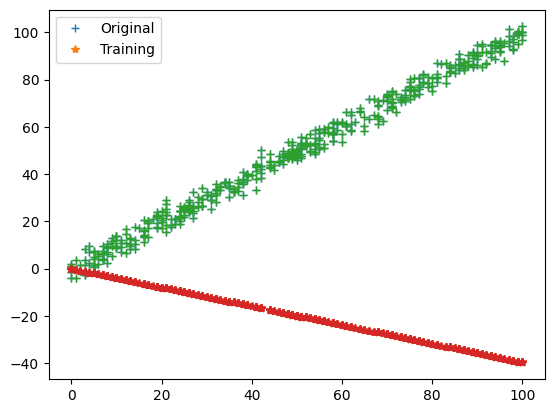

Iteration = 2, Loss = 1444.3824303134825


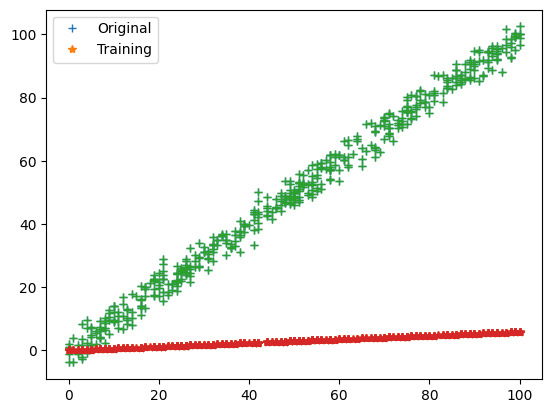

Iteration = 3, Loss = 657.4570419797471


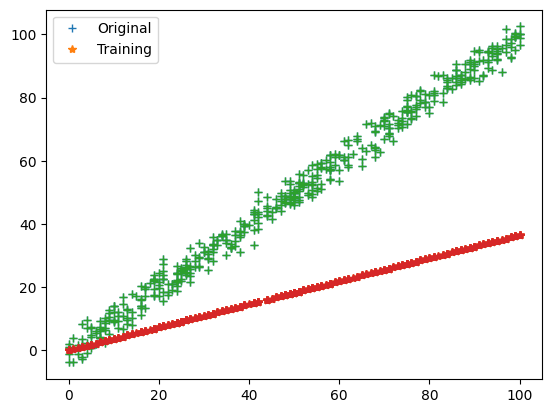

Iteration = 4, Loss = 300.42812151525413


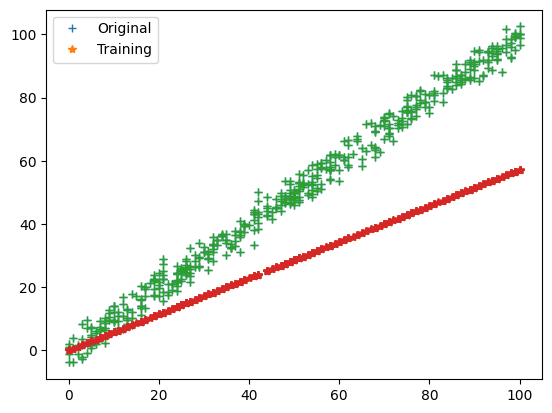

Iteration = 5, Loss = 138.4437046940893


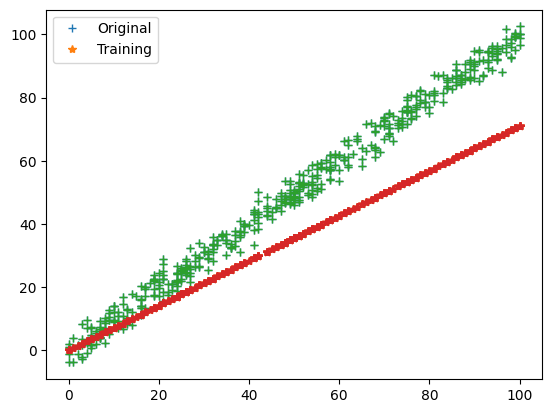

Iteration = 6, Loss = 64.95119521524069


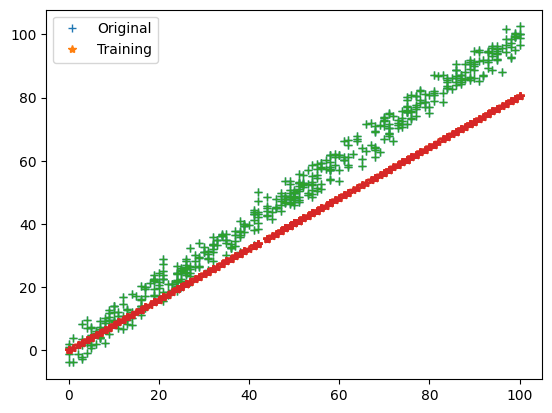

Iteration = 7, Loss = 31.607562114891838


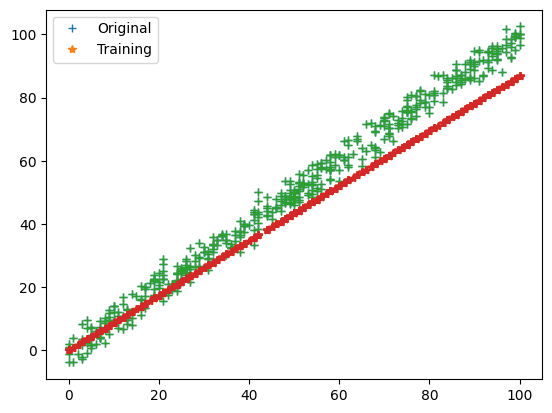

Iteration = 8, Loss = 16.47951869802599


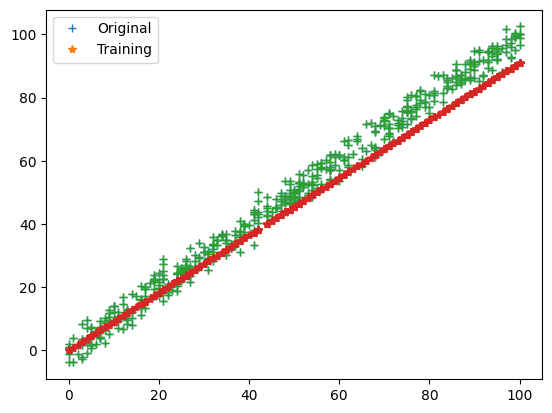

Iteration = 9, Loss = 9.61590849690159


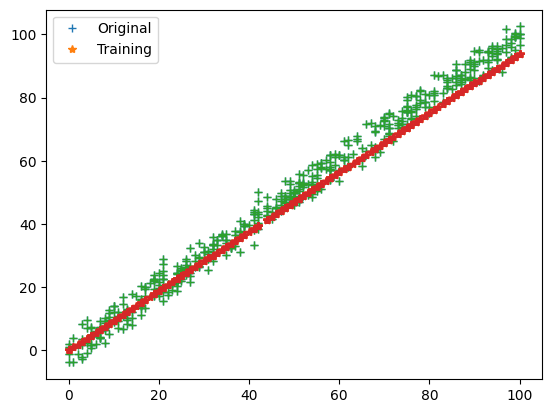

Iteration = 10, Loss = 6.501880799793337


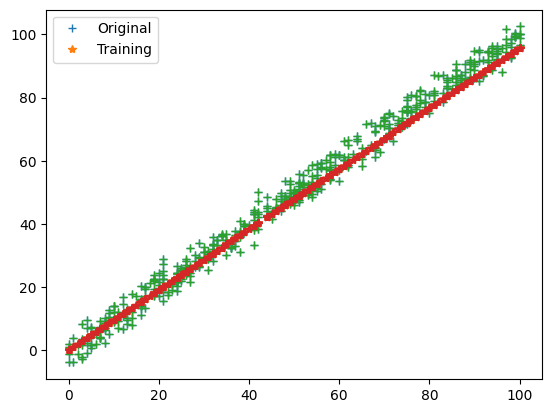

Iteration = 11, Loss = 5.089042837956708


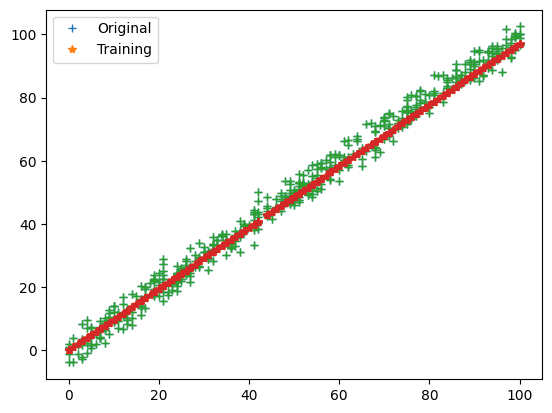

Iteration = 12, Loss = 4.448036543328026


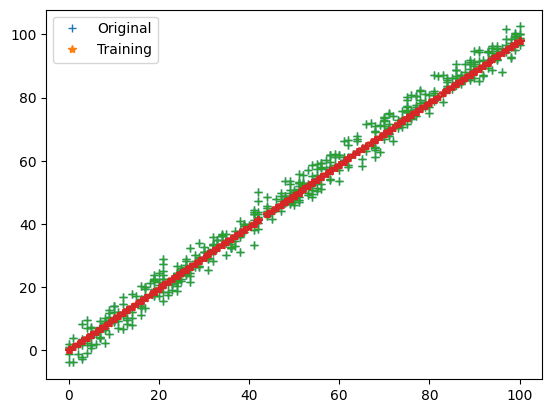

Iteration = 13, Loss = 4.1572111310315485


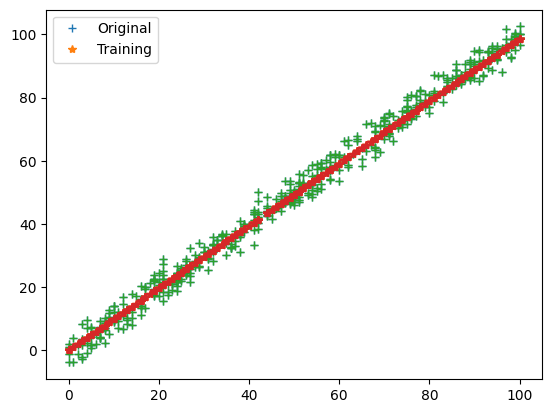

Iteration = 14, Loss = 4.025263172931345


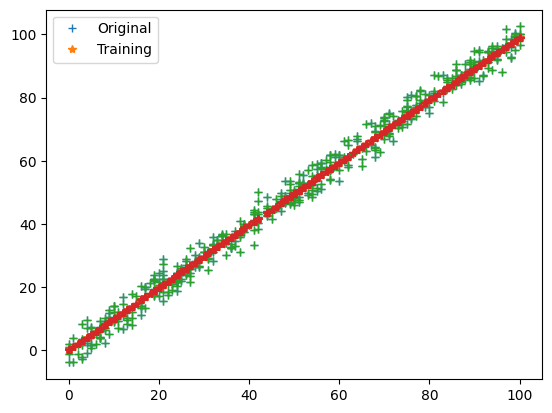

Iteration = 15, Loss = 3.965398091786577


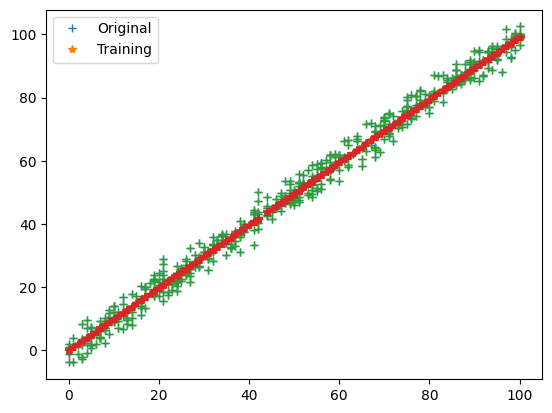

Iteration = 16, Loss = 3.9382370917658327


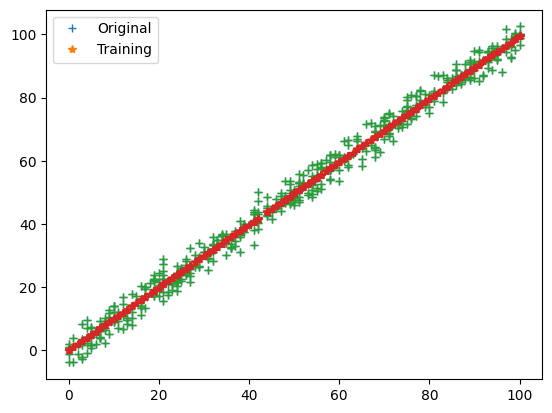

Iteration = 17, Loss = 3.92591396958282


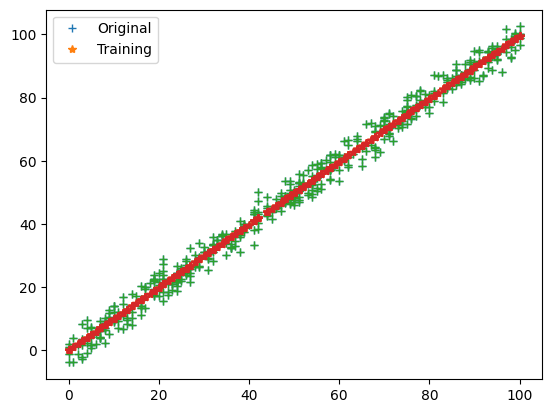

Iteration = 18, Loss = 3.9203228090172066


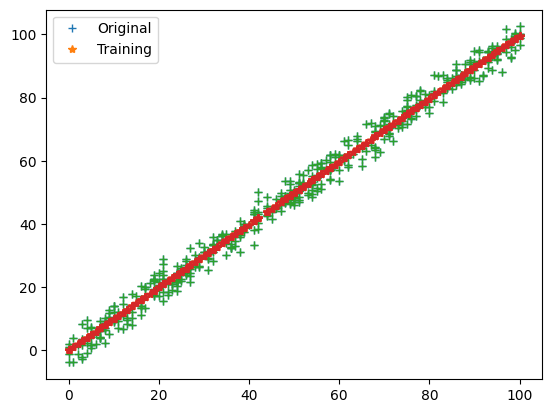

Iteration = 19, Loss = 3.917785946901378


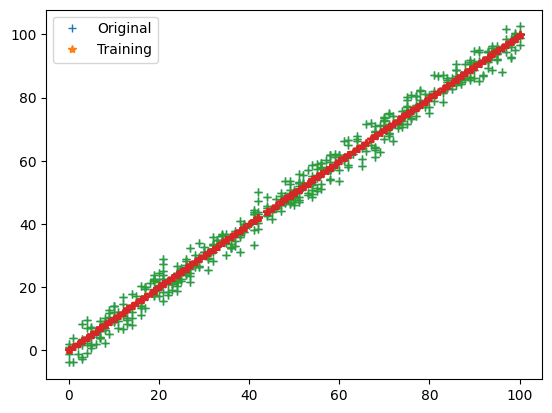

Iteration = 20, Loss = 3.9166348233826573


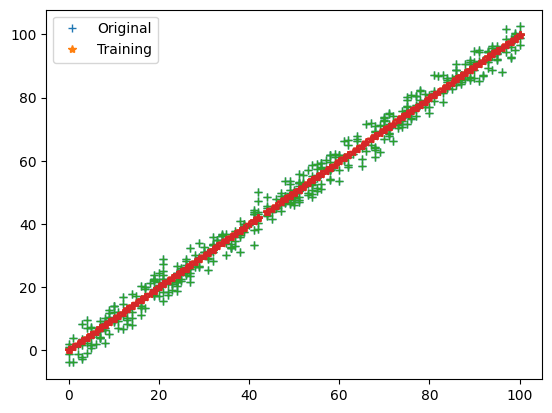

In [13]:
parameters, loss = train(train_input, train_output, 0.0001, 20)

In [14]:
print(parameters)

{'m': 0.9973726712752505, 'c': -0.030562050908516793}


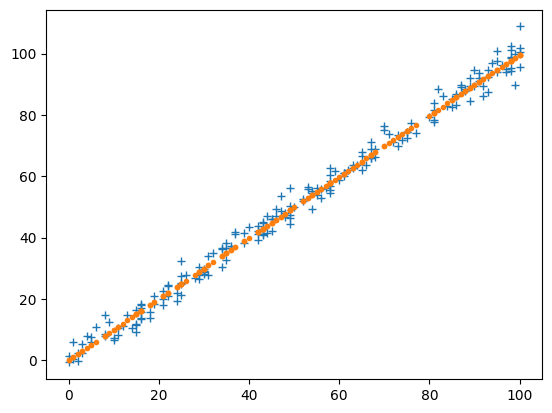

In [15]:
test_predictions = test_input * parameters["m"] + parameters["c"]
plt.figure()
plt.plot(test_input, test_output, '+')
plt.plot(test_input, test_predictions, '.')
plt.show()

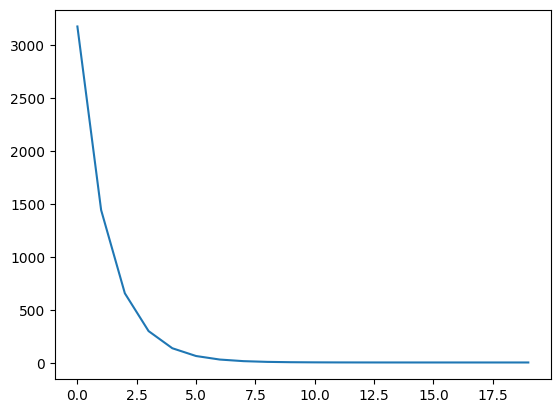

In [17]:
plt.plot(loss)

In [16]:
cost_function(test_predictions, test_output)

4.007818791374786

# Linear Regession using ScikitLearn Library

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
linear_regressor = LinearRegression()

In [22]:
linear_regressor.fit(train_input, train_output)

LinearRegression()

In [23]:
linear_regressor.coef_

array([[1.0009993]])

In [24]:
linear_regressor.intercept_

array([-0.23603461])

### Predict Test_Input

In [25]:
predicted_value = linear_regressor.predict(test_input)

In [26]:
from sklearn.metrics import mean_squared_error

cost = mean_squared_error(test_output, predicted_value)

In [27]:
cost

8.030031591835375

### Visualising the model performance

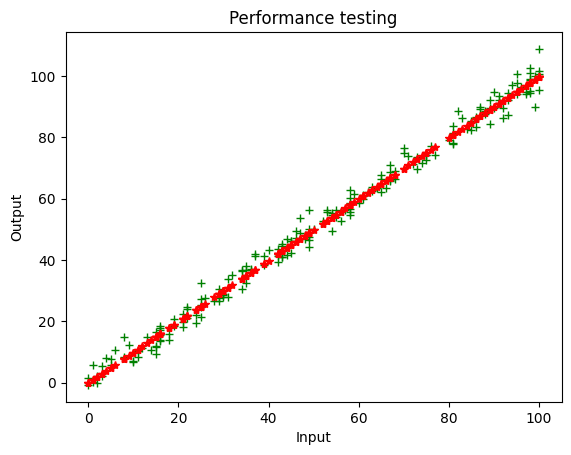

In [28]:
plt.plot(test_input, test_output, '+', color = "green")
plt.plot(test_input, predicted_value, '*', color = "red")
plt.title("Performance testing")
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()